# Basic Relationships between different baseball statistics

As a function of season.

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

#
from scipy import stats
import scipy

In [25]:
import matplotlib as mpl
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [2]:
import hittingpredictor as hp

In [3]:
df = hp.scrape_year(year=2019,cat='bat',verbose=0)

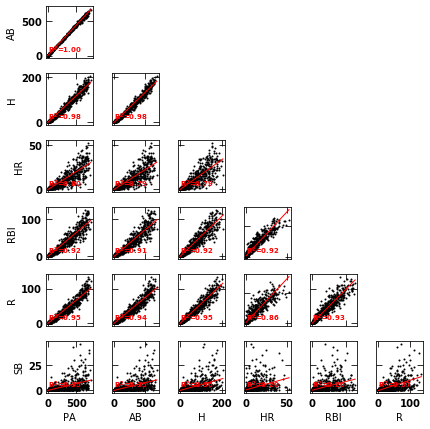

In [4]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations_nocolor.png')



In [5]:

# which years are we interested in querying?
years = range(2019, 2019+1)


year_dfs = []

for year in years:

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 12

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)



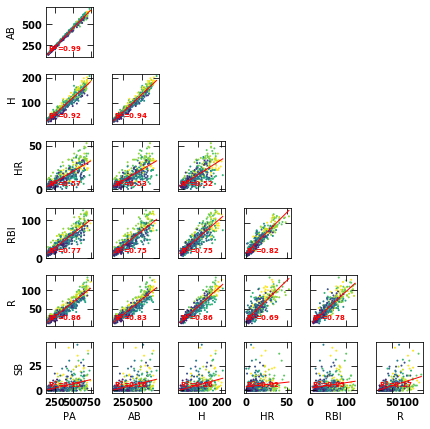

In [6]:
categories = ['PA','AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations.png')



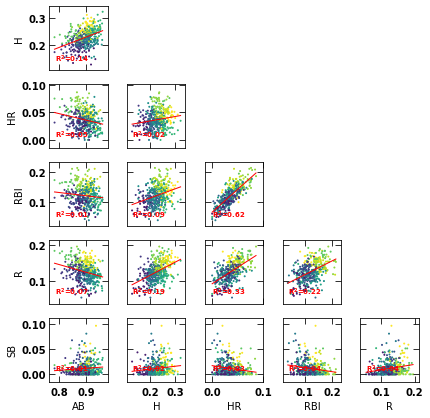

In [7]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['PA']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/battingcorrelations_normalized.png')

7    12.98997
Name: HR.Centroid, dtype: float64 7    48.301349
Name: RBI.Centroid, dtype: float64
1    24.951903
Name: HR.Centroid, dtype: float64 1    72.709352
Name: RBI.Centroid, dtype: float64
10    13.725088
Name: HR.Centroid, dtype: float64 10    58.003983
Name: RBI.Centroid, dtype: float64
4    20.077519
Name: HR.Centroid, dtype: float64 4    71.388172
Name: RBI.Centroid, dtype: float64
3    12.933069
Name: HR.Centroid, dtype: float64 3    49.3833
Name: RBI.Centroid, dtype: float64
11    31.479658
Name: HR.Centroid, dtype: float64 11    86.933623
Name: RBI.Centroid, dtype: float64
0    18.867897
Name: HR.Centroid, dtype: float64 0    76.231363
Name: RBI.Centroid, dtype: float64
2    10.482462
Name: HR.Centroid, dtype: float64 2    56.16969
Name: RBI.Centroid, dtype: float64
6    33.591343
Name: HR.Centroid, dtype: float64 6    91.19441
Name: RBI.Centroid, dtype: float64
5    40.08698
Name: HR.Centroid, dtype: float64 5    103.643641
Name: RBI.Centroid, dtype: float64
9    28.160

3    11.968711
Name: SB.Centroid, dtype: float64 3    0.238867
dtype: float64
11    2.674779
Name: SB.Centroid, dtype: float64 11    0.221558
dtype: float64
0    3.836547
Name: SB.Centroid, dtype: float64 0    0.264284
dtype: float64
2    9.657912
Name: SB.Centroid, dtype: float64 2    0.284775
dtype: float64
6    8.309187
Name: SB.Centroid, dtype: float64 6    0.281749
dtype: float64
5    2.837339
Name: SB.Centroid, dtype: float64 5    0.26196
dtype: float64
9    7.115027
Name: SB.Centroid, dtype: float64 9    0.272872
dtype: float64
7    52.610081
Name: R.Centroid, dtype: float64 7    0.19383
dtype: float64
1    77.128325
Name: R.Centroid, dtype: float64 1    0.223627
dtype: float64
10    75.856698
Name: R.Centroid, dtype: float64 10    0.260493
dtype: float64
4    67.608933
Name: R.Centroid, dtype: float64 4    0.237641
dtype: float64
3    69.105128
Name: R.Centroid, dtype: float64 3    0.238867
dtype: float64
11    66.953488
Name: R.Centroid, dtype: float64 11    0.221558
dtype: fl

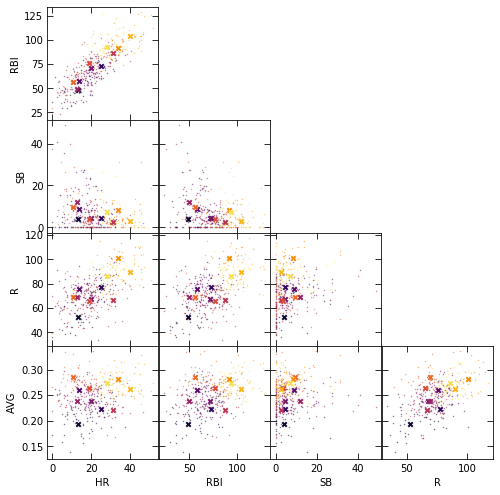

In [77]:
# do the same set of correlations normalized by PAs



categories = ['AB','H','HR','RBI','R','SB']
categories = ['HR','RBI','SB','R','H']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


    
fig = plt.figure(figsize=(7,7))

for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        for clusternum in range(1,12): 

            if categories[i] == 'H':
                cleanx = (np.array(df[categories[i]]).astype('float'))/np.array(df['AB']).astype('float')
            else:
                cleanx = np.array(df[categories[i]]).astype('float')

            if categories[j] == 'H':
                cleany = (np.array(df[categories[j]]).astype('float'))/np.array(df['AB']).astype('float')
            else:
                cleany = np.array(df[categories[j]]).astype('float')

            #if clusternum==1:

            cleanz = np.array(df['Value Cluster']).astype('float')
            cleann = np.array(df['PA']).astype('float')
            w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

            if categories[i]=='H':
                    ax.scatter((cleanx)[w],600.*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.6)
            elif categories[j]=='H':
                    ax.scatter(600.*(cleanx/cleann)[w],(cleany)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.6)
            else:
                    ax.scatter(600.*(cleanx/cleann)[w],600.*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.6)

            try:
                if categories[i]=='H':
                    xval = (np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))+\
                           np.abs(hitter_cluster_centroid_df['HR.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float')))/\
                    np.abs(hitter_cluster_centroid_df['AB.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                else:
                    xval = 6.*np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))

                if categories[j]=='H':
                    yval = (np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))+\
                           np.abs(hitter_cluster_centroid_df['HR.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float')))/\
                    np.abs(hitter_cluster_centroid_df['AB.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                else:
                    yval = 6.*np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                print(xval,yval)
                #ax.scatter(xval/100.,yval/100.,color=cm.viridis(clusternum/12.,1.),marker='x',s=10.)
                
                ax.scatter(xval,yval,facecolor=cm.inferno(clusternum/12.,1.),marker='x',s=20.,edgecolor='black')
            except:
                #print(categories[i],categories[j])
                pass


            if j==ncategories-1: 
                if categories[i]=='H':
                    ax.set_xlabel('AVG')
                else:
                    ax.set_xlabel(categories[i])
            else:
                ax.set_xticklabels(())

            if i==0: 
                if categories[j]=='H':
                    ax.set_ylabel('AVG')
                else:
                    
                    ax.set_ylabel(categories[j])
            else:
                ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


fig.tight_layout()

plt.subplots_adjust(hspace=0.002,wspace=0.002,right=1.20,top=1.20)


"""
axnums = [1,7,13,19,25]
for i,ival in enumerate(categories):
    
    ax = fig.add_subplot((ncategories),(ncategories),axnums[i])
    for clusternum in range(1,12): 

            if categories[i] == 'H':
                cleanx = (np.array(df[categories[i]]).astype('float'))/np.array(df['AB']).astype('float')
            else:
                cleanx = np.array(df[categories[i]]).astype('float')

            #if clusternum==1:

            cleanz = np.array(df['Value Cluster']).astype('float')
            cleann = np.array(df['PA']).astype('float')
            w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

            if categories[i]=='H':
                histvals = (cleanx)[w]
            else:
                histvals = 600.*(cleanx/cleann)[w]
            yvals = np.linspace(np.nanmin(histvals),np.nanmax(histvals),8)
            hist,vals = np.histogram(histvals,bins=yvals)
            print(hist)
            #print(cleanx[w].size)
            ax.plot(yvals[0:-1],hist,drawstyle='steps-mid',color=cm.inferno(clusternum/12.,1.),lw=1.)
"""

plt.savefig('figures/battingcorrelations_normalized_centers.png'.format(clusternum))
    



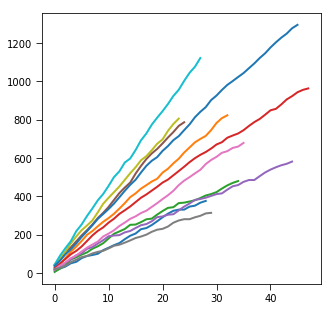

In [49]:
axnums = [1,2,3,4,5]

fig = plt.figure(figsize=(5,5))
for i,ival in enumerate(np.array(['HR'])):
    
    ax = fig.add_subplot(1,1,axnums[i])
    for clusternum in range(1,12): 

            if categories[i] == 'H':
                cleanx = (np.array(df[categories[i]]).astype('float'))/np.array(df['AB']).astype('float')
            else:
                cleanx = np.array(df[categories[i]]).astype('float')

            #if clusternum==1:

            cleanz = np.array(df['Value Cluster']).astype('float')
            cleann = np.array(df['PA']).astype('float')
            w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

            
            ax.plot(np.cumsum(600.*(cleanx/cleann)[w]))#/np.cumsum(np.ones(cleanx[w].size)))
            #ax.plot()

[10 22 34 46 58 70 82]
[ 4.6  10.12 15.64 21.16 26.68 32.2  37.72]
[ 0 12 12 12 12 12 12] [10.  12.9 16.3 19.  22.1 27.  31.9]
[ 6  7 11  7  4  8  3]


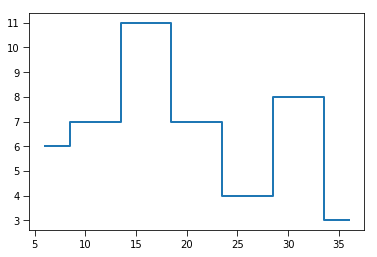

In [74]:
cleanx[w]

percs = np.arange(10,94,12)
print(percs)
#print(np.percentile(cleanx[w],percs))
print(percs*0.01*cleanx[w].size)
tmp = percs*0.01*cleanx[w].size
xvals = np.ediff1d(percs,to_begin=0)
yvals = np.percentile(cleanx[w],percs)
print(xvals,yvals)
#plt.plot(xvals,yvals)

yvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),8)
hist,vals = np.histogram(cleanx[w],bins=yvals)
print(hist)
#print(cleanx[w].size)
plt.plot(yvals[0:-1],hist,drawstyle='steps-mid')

### 

7    88.567392
Name: AB.Centroid, dtype: float64 7    15.001996
Name: H.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dtype: float64 7    2.164995
Name: HR.Centroid, dtype: float64
7    15.001996
Name: H.Centroid, dtype: float64 7    2.164995
Name: HR.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dtype: float64 7    8.050225
Name: RBI.Centroid, dtype: float64
7    15.001996
Name: H.Centroid, dtype: float64 7    8.050225
Name: RBI.Centroid, dtype: float64
7    2.164995
Name: HR.Centroid, dtype: float64 7    8.050225
Name: RBI.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    15.001996
Name: H.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    2.164995
Name: HR.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    8.050225
Name: RBI.Centroid, dtype: float64 7    8.768347
Name: R.Centroid, dtype: float64
7    88.567392
Name: AB.Centroid, dt

0    92.555205
Name: AB.Centroid, dtype: float64 0    21.31622
Name: H.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dtype: float64 0    3.14465
Name: HR.Centroid, dtype: float64
0    21.31622
Name: H.Centroid, dtype: float64 0    3.14465
Name: HR.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dtype: float64 0    12.705227
Name: RBI.Centroid, dtype: float64
0    21.31622
Name: H.Centroid, dtype: float64 0    12.705227
Name: RBI.Centroid, dtype: float64
0    3.14465
Name: HR.Centroid, dtype: float64 0    12.705227
Name: RBI.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    21.31622
Name: H.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    3.14465
Name: HR.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    12.705227
Name: RBI.Centroid, dtype: float64 0    10.896134
Name: R.Centroid, dtype: float64
0    92.555205
Name: AB.Centroid, dt

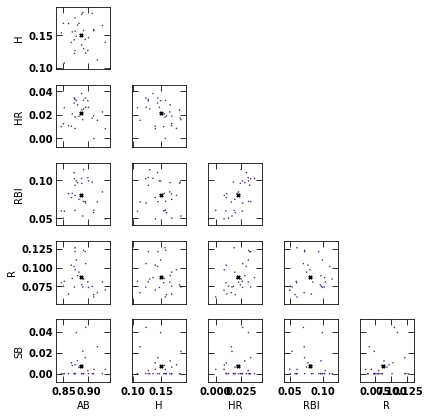

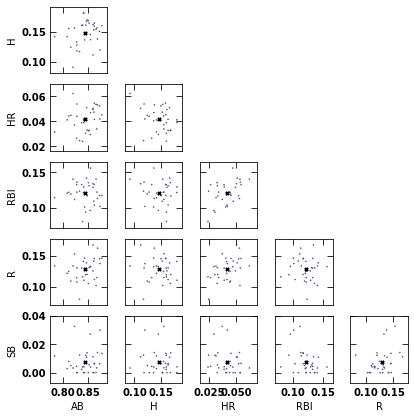

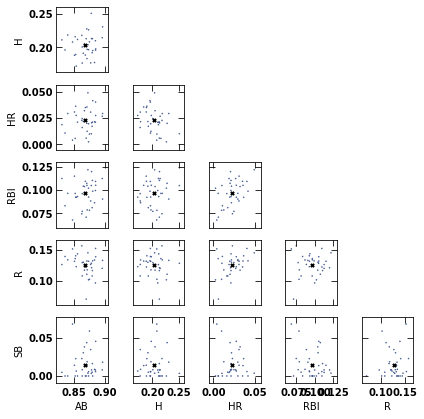

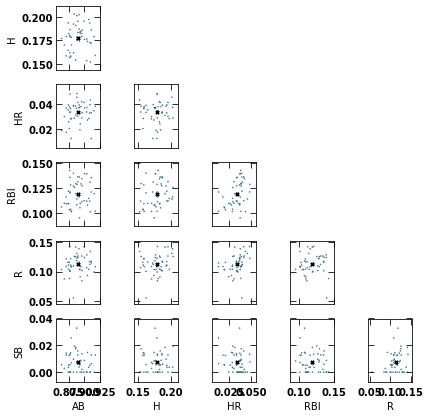

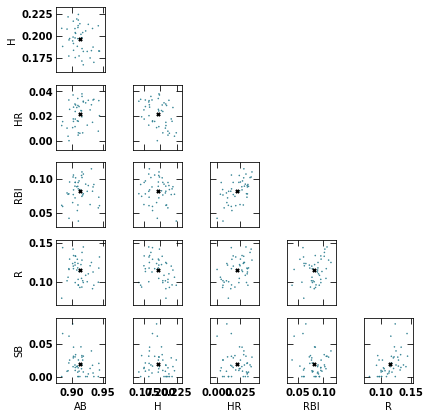

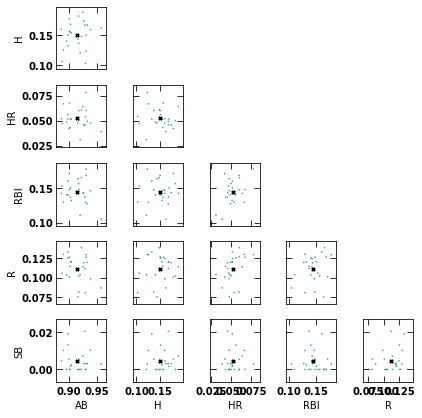

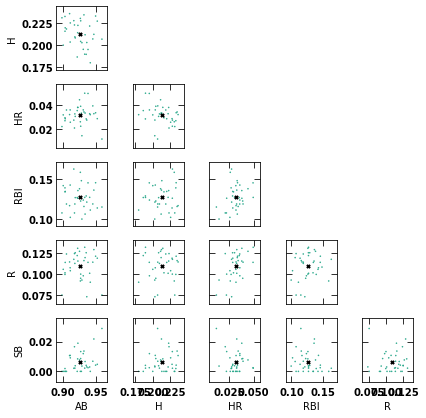

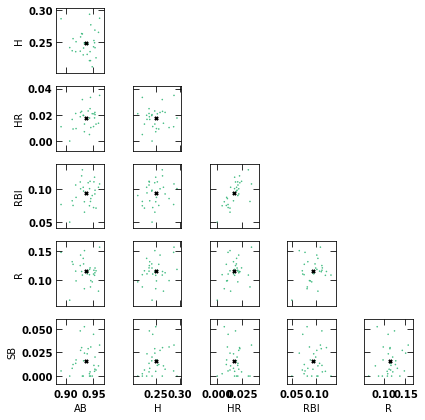

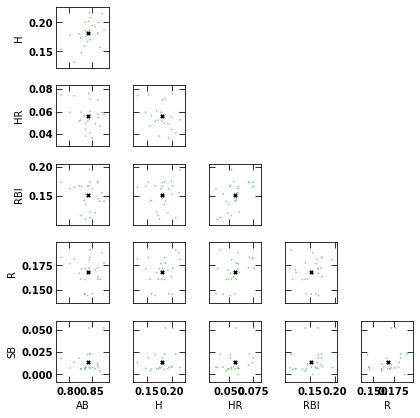

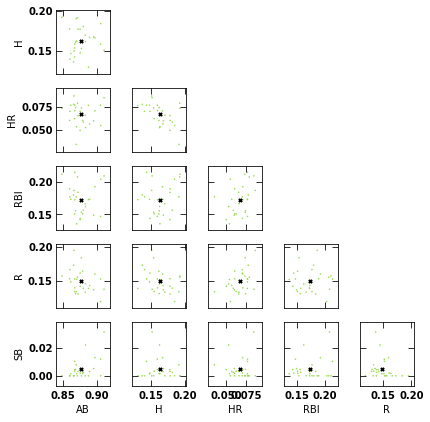

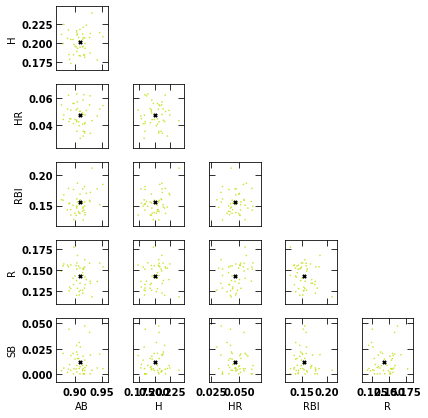

In [11]:
# do the same set of correlations normalized by PAs

categories = ['AB','H','HR','RBI','R','SB']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


for clusternum in range(1,12): 
    
    fig = plt.figure(figsize=(7,7))

    for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        if categories[i] == 'H':
            cleanx = np.array(df[categories[i]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleanx = np.array(df[categories[i]]).astype('float')

        if categories[j] == 'H':
            cleany = np.array(df[categories[j]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleany = np.array(df[categories[j]]).astype('float')

        cleanz = np.array(df['Value Cluster']).astype('float')
        cleann = np.array(df['PA']).astype('float')
        w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

        ax.scatter((cleanx/cleann)[w],(cleany/cleann)[w],color=cm.viridis(cleanz[w]/12.,1.),s=0.3)

        try:
            xval = np.abs(hitter_cluster_centroid_df[categories[i]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            yval = np.abs(hitter_cluster_centroid_df[categories[j]+'.Centroid'][hitter_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            print(xval,yval)
            ax.scatter(xval/100.,yval/100.,color='black',marker='x',s=10.)
        except:
            print(categories[i],categories[j])
            
            
        if j==ncategories-1: 
            ax.set_xlabel(categories[i])
        else:
            ax.set_xticklabels(())

        if i==0: 
            ax.set_ylabel(categories[j])
        else:
            ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


    fig.tight_layout()

    plt.savefig('figures/battingcorrelations_normalized{}.png'.format(clusternum))
    


## Part 2: Pitching Correlations

In [78]:
import pitchingpredictor as pp

In [79]:
df = pp.scrape_year(year=2019,cat='pit',verbose=0)

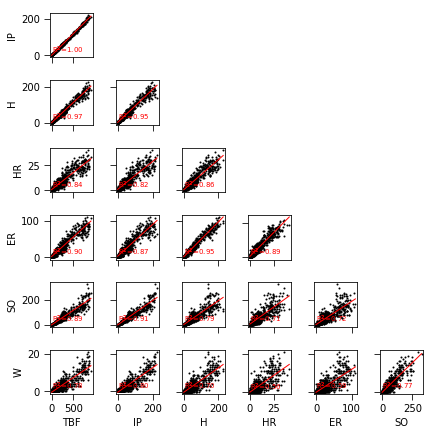

In [80]:
categories = ['TBF','IP','H','HR','ER','SO','W']


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(df[categories[i]],df[categories[j]],color='black',s=1.)

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))

    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations_nocolor.png')




In [81]:

# which years are we interested in querying?
years = range(2019, 2019+1)


year_dfs = []

for year in years:

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




nclusters = 12

year_df,df,stereotype_df,pitching_cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data,years,nclusters,min_ip=10,verbose=0)




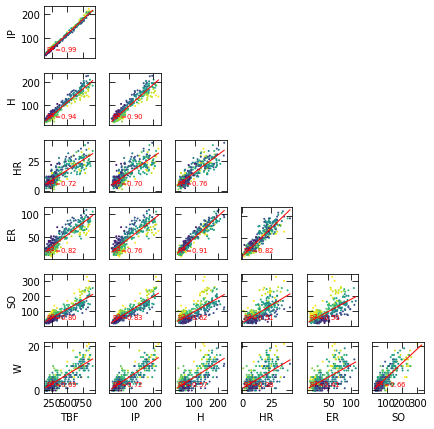

In [82]:
categories = ['TBF','IP','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    w = np.where(np.isfinite(cleanx) & np.isfinite(cleany))
    
    ax.scatter(cleanx,cleany,color=cm.viridis(cleanz/12.,1.),s=1.)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(cleanx[w],cleany[w])
    
    xvals = np.linspace(np.nanmin(cleanx[w]),np.nanmax(cleanx[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin(cleanx[w]),np.nanmin(cleany[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations.png')



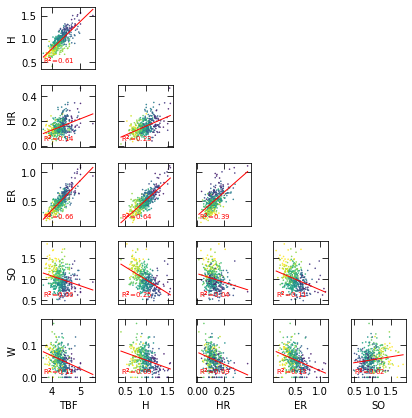

In [83]:
categories = ['TBF','H','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)



fig = plt.figure(figsize=(7,7))

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            

    
    cleanx = np.array(df[categories[i]]).astype('float')
    cleany = np.array(df[categories[j]]).astype('float')
    cleanz = np.array(df['Value Cluster']).astype('float')
    cleann = np.array(df['IP']).astype('float')
    w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann))
    
    ax.scatter(cleanx/cleann,cleany/cleann,color=cm.viridis(cleanz/12.,1.),s=0.3)


    # do the stats
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((cleanx/cleann)[w],(cleany/cleann)[w])
    
    xvals = np.linspace(np.nanmin((cleanx/cleann)[w]),np.nanmax((cleanx/cleann)[w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    
    ax.text(np.nanmin((cleanx/cleann)[w]),np.nanmin((cleany/cleann)[w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis="y",which='both',direction="in")
    ax.tick_params(axis="x",which='both',direction="in",pad=5)
        
        
fig.tight_layout()

plt.savefig('figures/pitchingcorrelations_normalized.png')

TBF H
TBF BB
10    110.535799
Name: H.Centroid, dtype: float64 10    49.617863
Name: BB.Centroid, dtype: float64
TBF HR
10    110.535799
Name: H.Centroid, dtype: float64 10    18.97224
Name: HR.Centroid, dtype: float64
10    49.617863
Name: BB.Centroid, dtype: float64 10    18.97224
Name: HR.Centroid, dtype: float64
TBF ER
10    110.535799
Name: H.Centroid, dtype: float64 10    76.281348
Name: ER.Centroid, dtype: float64
10    49.617863
Name: BB.Centroid, dtype: float64 10    76.281348
Name: ER.Centroid, dtype: float64
10    18.97224
Name: HR.Centroid, dtype: float64 10    76.281348
Name: ER.Centroid, dtype: float64
TBF SO
10    110.535799
Name: H.Centroid, dtype: float64 10    86.60052
Name: SO.Centroid, dtype: float64
10    49.617863
Name: BB.Centroid, dtype: float64 10    86.60052
Name: SO.Centroid, dtype: float64
10    18.97224
Name: HR.Centroid, dtype: float64 10    86.60052
Name: SO.Centroid, dtype: float64
10    76.281348
Name: ER.Centroid, dtype: float64 10    86.60052
Name: SO

TBF H
TBF BB
4    68.84792
Name: H.Centroid, dtype: float64 4    40.299391
Name: BB.Centroid, dtype: float64
TBF HR
4    68.84792
Name: H.Centroid, dtype: float64 4    13.175422
Name: HR.Centroid, dtype: float64
4    40.299391
Name: BB.Centroid, dtype: float64 4    13.175422
Name: HR.Centroid, dtype: float64
TBF ER
4    68.84792
Name: H.Centroid, dtype: float64 4    41.028091
Name: ER.Centroid, dtype: float64
4    40.299391
Name: BB.Centroid, dtype: float64 4    41.028091
Name: ER.Centroid, dtype: float64
4    13.175422
Name: HR.Centroid, dtype: float64 4    41.028091
Name: ER.Centroid, dtype: float64
TBF SO
4    68.84792
Name: H.Centroid, dtype: float64 4    99.025073
Name: SO.Centroid, dtype: float64
4    40.299391
Name: BB.Centroid, dtype: float64 4    99.025073
Name: SO.Centroid, dtype: float64
4    13.175422
Name: HR.Centroid, dtype: float64 4    99.025073
Name: SO.Centroid, dtype: float64
4    41.028091
Name: ER.Centroid, dtype: float64 4    99.025073
Name: SO.Centroid, dtype: fl

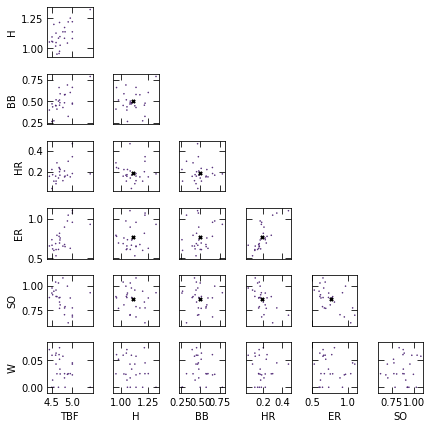

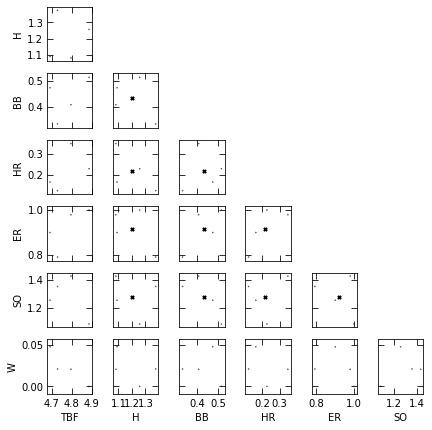

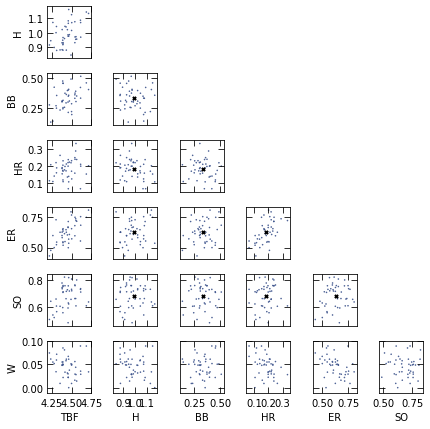

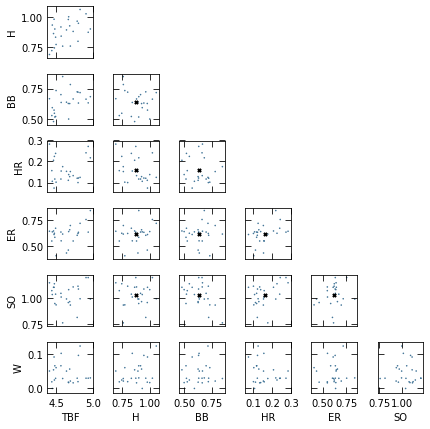

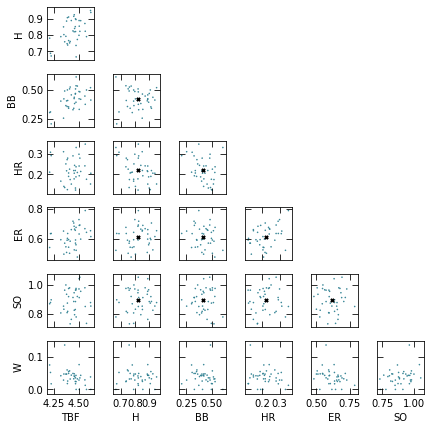

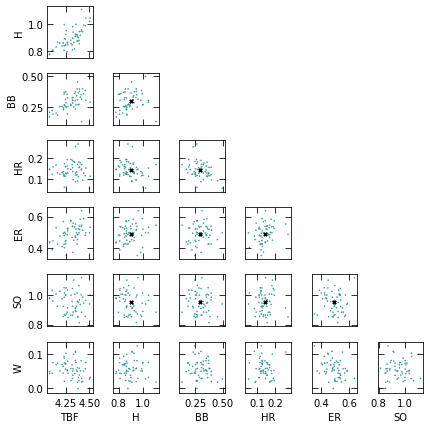

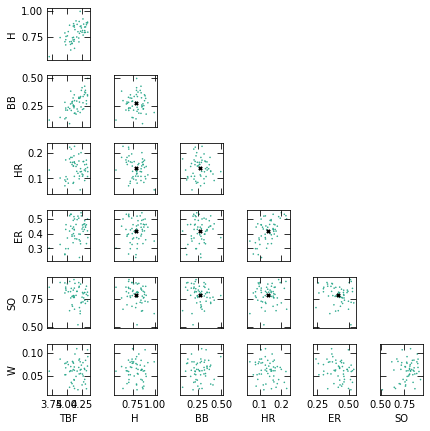

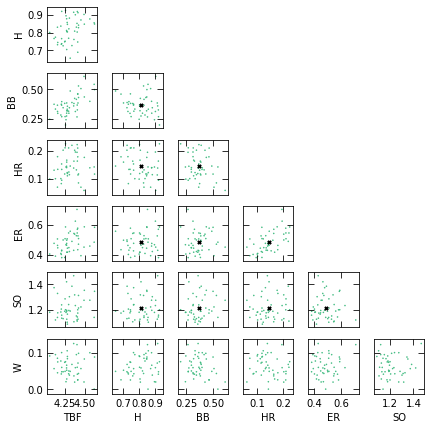

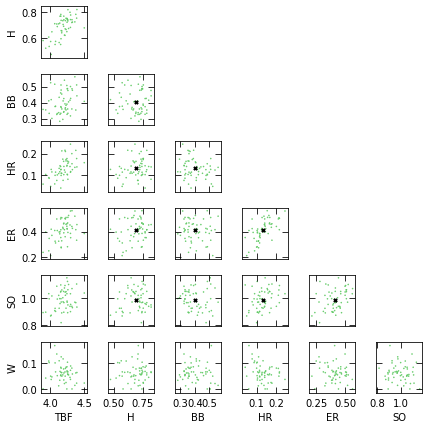

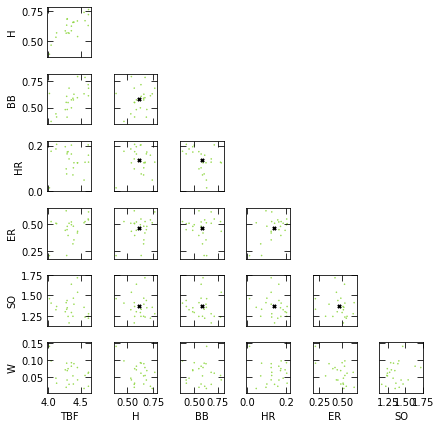

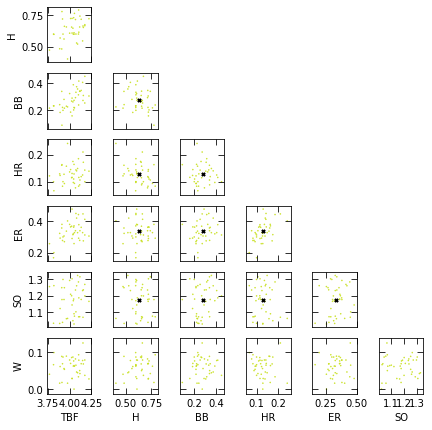

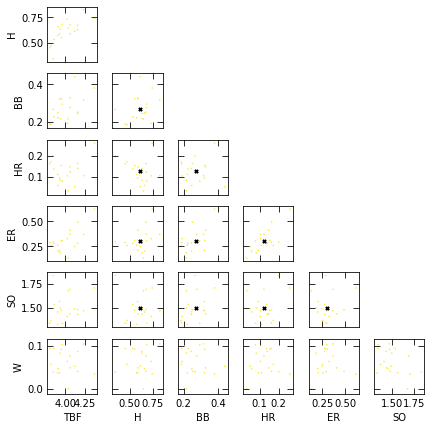

In [84]:
categories = ['TBF','H','BB','HR','ER','SO','W']



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)

for clusternum in range(1,13):

    fig = plt.figure(figsize=(7,7))

    for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        if categories[i] == 'H':
            cleanx = np.array(df[categories[i]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleanx = np.array(df[categories[i]]).astype('float')

        if categories[j] == 'H':
            cleany = np.array(df[categories[j]]).astype('float') - np.array(df['HR']).astype('float')
        else:
            cleany = np.array(df[categories[j]]).astype('float')

        cleanz = np.array(df['Value Cluster']).astype('float')
        cleann = np.ones(cleanx.size)#np.array(df['IP']).astype('float')
        cleann = np.array(df['IP']).astype('float')
        w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

        ax.scatter((cleanx/cleann)[w],(cleany/cleann)[w],color=cm.viridis(cleanz[w]/12.,1.),s=0.3)

        try:
            xval = np.abs(pitching_cluster_centroid_df[categories[i]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            yval = np.abs(pitching_cluster_centroid_df[categories[j]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
            print(xval,yval)
            ax.scatter(xval/100.,yval/100.,color='black',marker='x',s=10.)
        except:
            pass
            #print(categories[i],categories[j])

        if j==ncategories-1: 
            ax.set_xlabel(categories[i])
        else:
            ax.set_xticklabels(())

        if i==0: 
            ax.set_ylabel(categories[j])
        else:
            ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


    fig.tight_layout()

    plt.savefig('figures/pitchingcorrelations_cluster{}.png'.format(clusternum))

10    113.833438
Name: HR.Centroid, dtype: float64 10    457.688085
Name: ER.Centroid, dtype: float64
3    129.958047
Name: HR.Centroid, dtype: float64 3    550.759866
Name: ER.Centroid, dtype: float64
8    110.729166
Name: HR.Centroid, dtype: float64 8    376.779012
Name: ER.Centroid, dtype: float64
7    95.088715
Name: HR.Centroid, dtype: float64 7    369.210509
Name: ER.Centroid, dtype: float64
1    132.441343
Name: HR.Centroid, dtype: float64 1    370.260764
Name: ER.Centroid, dtype: float64
0    85.459085
Name: HR.Centroid, dtype: float64 0    295.196396
Name: ER.Centroid, dtype: float64
6    83.503485
Name: HR.Centroid, dtype: float64 6    250.853331
Name: ER.Centroid, dtype: float64
5    86.507457
Name: HR.Centroid, dtype: float64 5    291.459812
Name: ER.Centroid, dtype: float64
4    79.052531
Name: HR.Centroid, dtype: float64 4    246.168545
Name: ER.Centroid, dtype: float64
9    83.10273
Name: HR.Centroid, dtype: float64 9    278.655609
Name: ER.Centroid, dtype: float64
2    

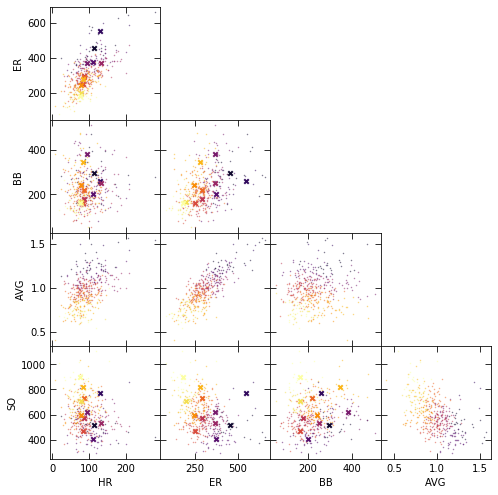

In [90]:
# do the same set of correlations normalized by PAs



categories = ['TBF','H','BB','HR','ER','SO','W']
categories = ['HR', 'ER', 'BB', 'H', 'SO']

# want: K/9
# ERA
# HR/9
# H/9
# BB/9



ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


    
fig = plt.figure(figsize=(7,7))

for x in catrange:
        i = (x-1)%(ncategories) # this is the column
        j = int((x-1)/(ncategories)) # this is the row
        #print(i,j,x)

        pltnum = ((j)*(ncategories-1)) + (i) + 1




        if i>=j: continue

        #print(pltnum,i,j)



        ax = fig.add_subplot((ncategories),(ncategories),x)

        for clusternum in range(1,13): 

            if categories[i] == 'H':
                cleanx = (np.array(df[categories[i]]).astype('float'))/np.array(df['IP']).astype('float')
            else:
                cleanx = np.array(df[categories[i]]).astype('float')

            if categories[j] == 'H':
                cleany = (np.array(df[categories[j]]).astype('float'))/np.array(df['IP']).astype('float')
            else:
                cleany = np.array(df[categories[j]]).astype('float')

            #if clusternum==1:

            cleanz = np.array(df['Value Cluster']).astype('float')
            cleann = np.array(df['IP']).astype('float')
            w = np.where(np.isfinite(cleanx/cleann) & np.isfinite(cleany/cleann) & (cleanz==clusternum))

            if categories[i]=='H':
                    ax.scatter((cleanx)[w],600.*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.6)
            elif categories[j]=='H':
                    ax.scatter(600.*(cleanx/cleann)[w],(cleany)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.6)
            else:
                    ax.scatter(600.*(cleanx/cleann)[w],600.*(cleany/cleann)[w],color=cm.inferno(clusternum/12.,1.),s=0.2,zorder=-9,alpha=0.6)

            try:
                if categories[i]=='H':
                    xval = (np.abs(pitching_cluster_centroid_df[categories[i]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))+\
                           np.abs(pitching_cluster_centroid_df['HR.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float')))/\
                    np.abs(pitching_cluster_centroid_df['IP.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                else:
                    xval = 6.*np.abs(pitching_cluster_centroid_df[categories[i]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))

                if categories[j]=='H':
                    yval = (np.abs(pitching_cluster_centroid_df[categories[j]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))+\
                           np.abs(pitching_cluster_centroid_df['HR.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float')))/\
                    np.abs(pitching_cluster_centroid_df['IP.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                else:
                    yval = 6.*np.abs(pitching_cluster_centroid_df[categories[j]+'.Centroid'][pitching_cluster_centroid_df['Value Cluster']==clusternum].astype('float'))
                print(xval,yval)
                #ax.scatter(xval/100.,yval/100.,color=cm.viridis(clusternum/12.,1.),marker='x',s=10.)
                
                ax.scatter(xval,yval,facecolor=cm.inferno(clusternum/12.,1.),marker='x',s=20.,edgecolor='black')
            except:
                #print(categories[i],categories[j])
                pass


            if j==ncategories-1: 
                if categories[i]=='H':
                    ax.set_xlabel('AVG')
                else:
                    ax.set_xlabel(categories[i])
            else:
                ax.set_xticklabels(())

            if i==0: 
                if categories[j]=='H':
                    ax.set_ylabel('AVG')
                else:
                    
                    ax.set_ylabel(categories[j])
            else:
                ax.set_yticklabels(())

        ax.yaxis.set_ticks_position('both')
        ax.xaxis.set_ticks_position('both')
        ax.tick_params(axis="y",which='both',direction="in")
        ax.tick_params(axis="x",which='both',direction="in",pad=5)


fig.tight_layout()

plt.subplots_adjust(hspace=0.002,wspace=0.002,right=1.20,top=1.20)


plt.savefig('figures/pitchingcorrelations_normalized_centers.png'.format(clusternum))
    


